In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from collisions import collide_oo, collide_ow
from typing import List, Tuple, Union

In [2]:
np.random.seed(42)  # Set a random seed for reproducibility

In [15]:
def generate_right_triangle(BB_MAX: float, side_length: float) -> List[Tuple[float, float]]:
    """Generate a right triangle with a given side length and a random position and rotation within the bounding box."""
    angle = np.random.uniform(0, 2 * np.pi)
    rotation_matrix = jnp.array([[jnp.cos(angle), -jnp.sin(angle)], [jnp.sin(angle), jnp.cos(angle)]])

    # Define a right triangle with vertices at (0, 0), (side_length, 0), and (0, side_length)
    triangle_vertices = jnp.array([[0, 0], [side_length, 0], [0, side_length]])

    # Rotate and translate the triangle
    rotated_vertices = jnp.dot(rotation_matrix, triangle_vertices.T).T
    translation = jnp.array([np.random.uniform(-BB_MAX + side_length, BB_MAX - side_length),
                              np.random.uniform(-BB_MAX + side_length, BB_MAX - side_length)])
    translated_vertices = rotated_vertices + translation

    return translated_vertices.tolist()

def triangle_collision_test(bbp=0.1):
    '''
    Tests the functions in collisions.py by plotting two random triangles 
    in the bounding box and checking for collisions.
    '''
    # Generate random triangle vertices within the bounding box
    
    BB_MAX = 1
    BB_MAXp = BB_MAX + bbp
    side_length = 0.5
    triangle1_vertices = generate_right_triangle(BB_MAXp, side_length)
    triangle2_vertices = generate_right_triangle(BB_MAXp, side_length)

    # Plot the triangles and the bounding box
    fig, ax = plt.subplots()
    ax.set_xlim(-BB_MAX - 0.1, BB_MAX + 0.1)
    ax.set_ylim(-BB_MAX - 0.1, BB_MAX + 0.1)
    ax.plot([-BB_MAX, BB_MAX, BB_MAX, -BB_MAX, -BB_MAX], [-BB_MAX, -BB_MAX, BB_MAX, BB_MAX, -BB_MAX], 'k--', label="Bounding Box")
    ax.plot(*zip(*triangle1_vertices, triangle1_vertices[0]), 'ro-', label="Triangle 1")
    ax.plot(*zip(*triangle2_vertices, triangle2_vertices[0]), 'bo-', label="Triangle 2")
    ax.legend()
    plt.show()

    # Test the collide_oo function
    collide_result, mpv = collide_oo(triangle1_vertices, triangle2_vertices)
    print(f"Collide_oo result: {collide_result}, MPV: {mpv}")

    if collide_result:
        # If the triangles collide, translate the second triangle by the MPV
        triangle2_vertices_mpv_M = jnp.array(triangle2_vertices) - 1.1 * mpv
        triangle2_vertices_mpv_P = jnp.array(triangle2_vertices) + 1.1 * mpv
    else:
        triangle2_vertices_mpv = triangle2_vertices

    # Plot the triangles and the bounding box after applying the MPV
    fig, ax = plt.subplots()
    ax.set_xlim(-BB_MAX - 0.1, BB_MAX + 0.1)
    ax.set_ylim(-BB_MAX - 0.1, BB_MAX + 0.1)
    ax.plot([-BB_MAX, BB_MAX, BB_MAX, -BB_MAX, -BB_MAX], [-BB_MAX, -BB_MAX, BB_MAX, BB_MAX, -BB_MAX], 'k--', label="Bounding Box")
    ax.plot(*zip(*triangle1_vertices, triangle1_vertices[0]), 'ro-', label="Triangle 1")
    if collide_result:
        ax.plot(*zip(*triangle2_vertices_mpv_M, triangle2_vertices_mpv_M[0]), 'bo-', label="Triangle 2 (MPV minus)")
        ax.plot(*zip(*triangle2_vertices_mpv_P, triangle2_vertices_mpv_P[0]), 'go-', label="Triangle 2 (MPV plus)")
    else:
        ax.plot(*zip(*triangle2_vertices_mpv, triangle2_vertices_mpv[0]), 'bo-', label="Triangle 2 (no collide)")
    ax.legend()
    plt.show()

    # Test the collide_ow function for both triangles
    collide_result1, push_vector1 = collide_ow(triangle1_vertices, BB_MAX)
    print(f"Collide_ow for Triangle 1: {collide_result1}, Push Vector: {push_vector1}")

    collide_result2, push_vector2 = collide_ow(triangle2_vertices, BB_MAX)
    print(f"Collide_ow for Triangle 2: {collide_result2}, Push Vector: {push_vector2}")


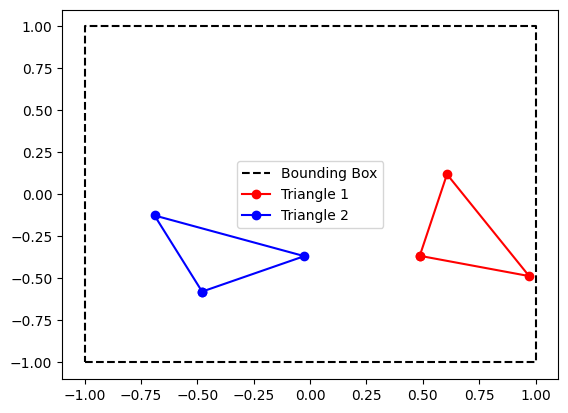

Collide_oo result: False, MPV: None


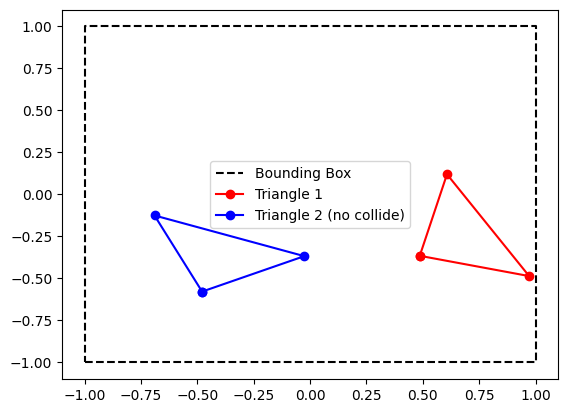

Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


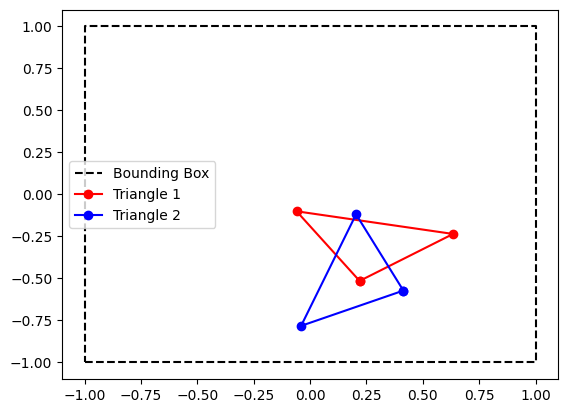

Collide_oo result: True, MPV: [0.08644798 0.05830873]


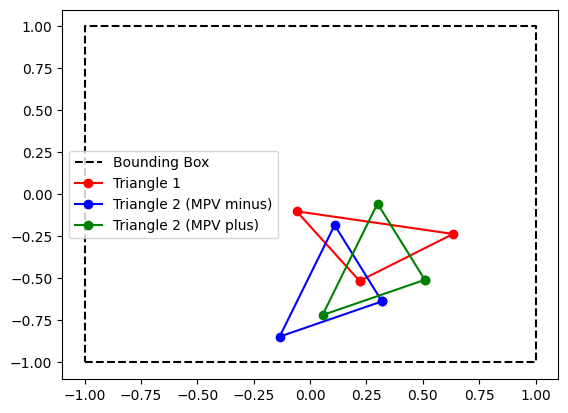

Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


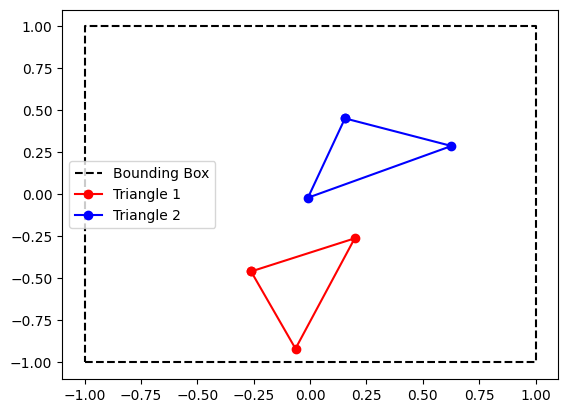

Collide_oo result: False, MPV: None


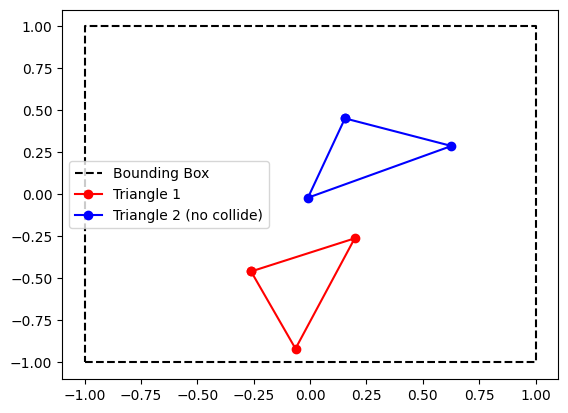

Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


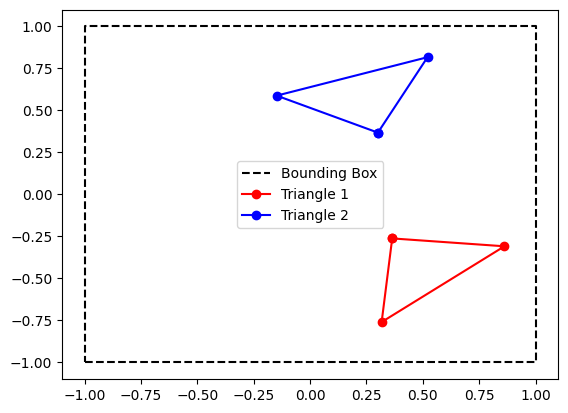

Collide_oo result: False, MPV: None


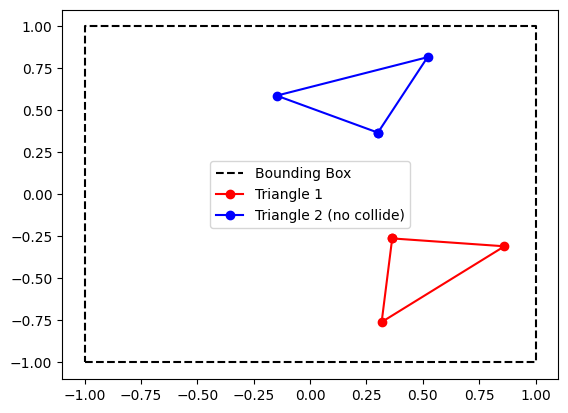

Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


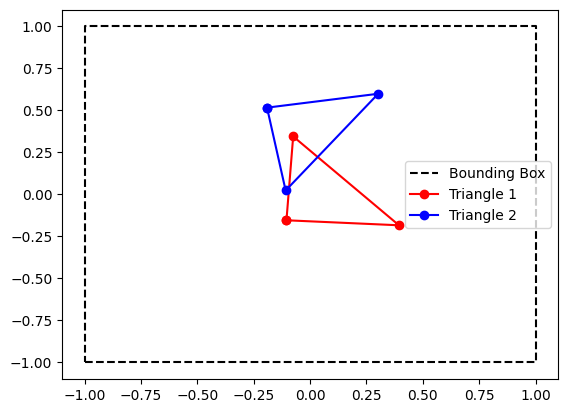

Collide_oo result: True, MPV: [-0.09189644  0.06552814]


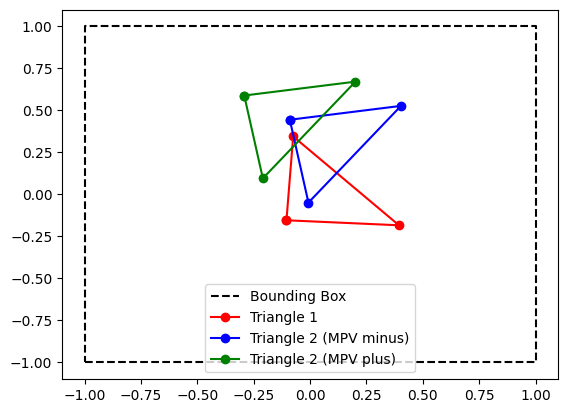

Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


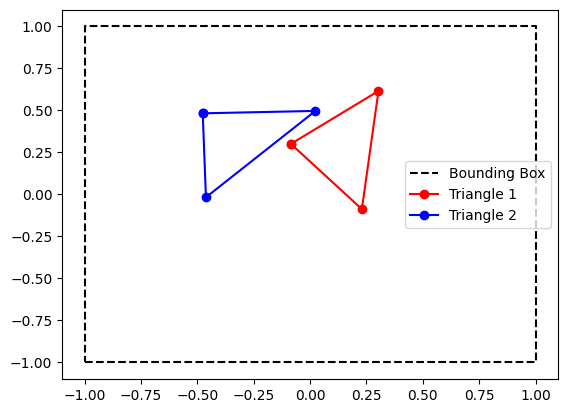

Collide_oo result: False, MPV: None


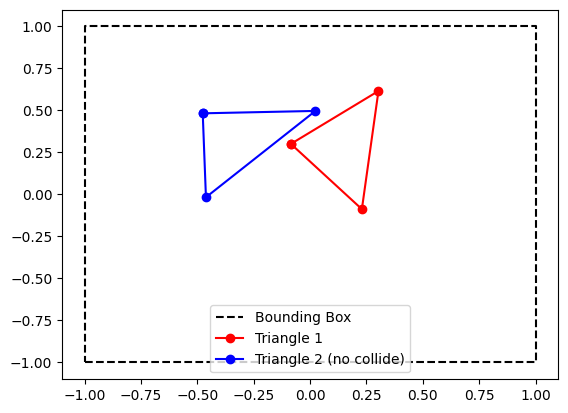

Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


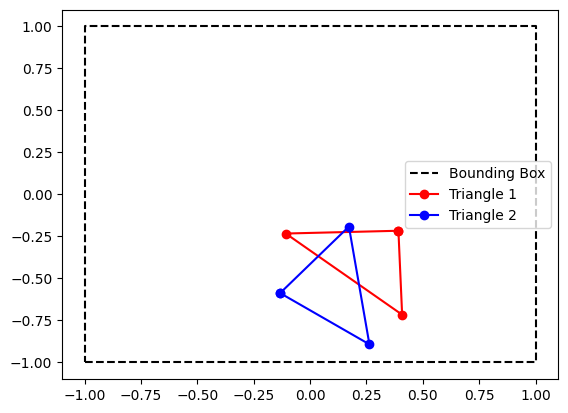

Collide_oo result: True, MPV: [0.08288877 0.1075881 ]


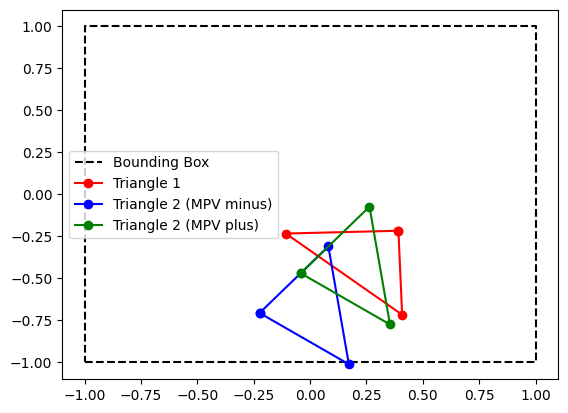

Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


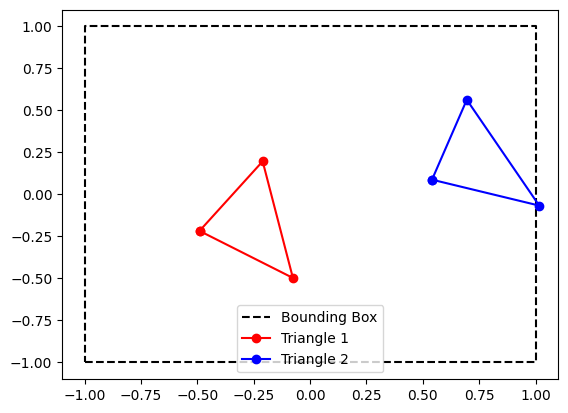

Collide_oo result: False, MPV: None


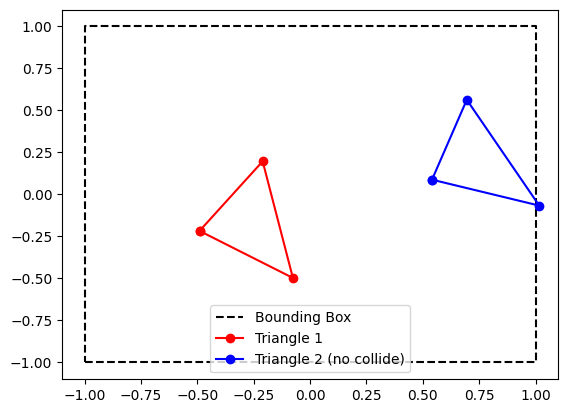

Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: True, Push Vector: [-0.01631689  0.        ]


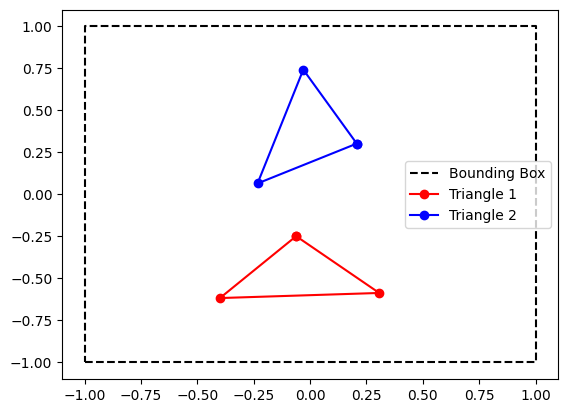

Collide_oo result: False, MPV: None


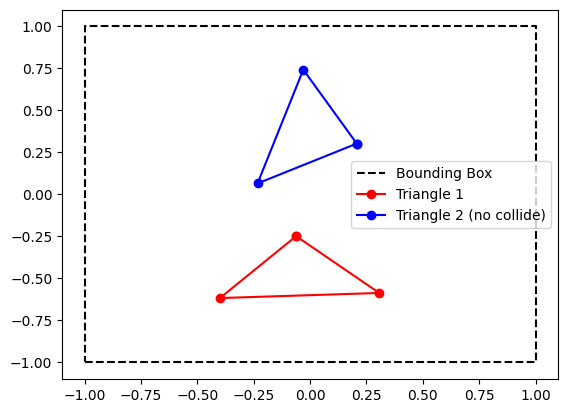

Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: False, Push Vector: [0. 0.]


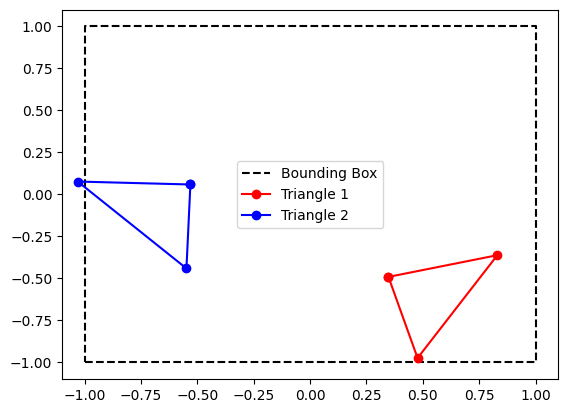

Collide_oo result: False, MPV: None


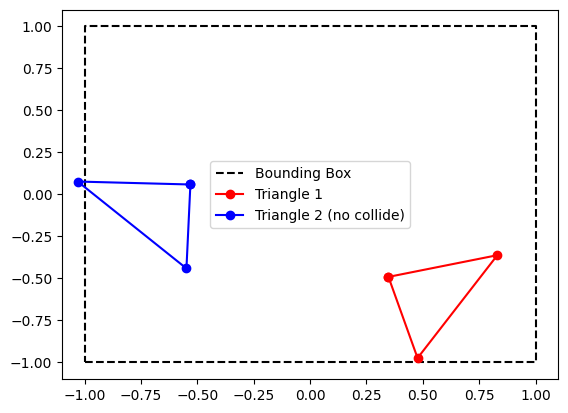

Collide_ow for Triangle 1: False, Push Vector: [0. 0.]
Collide_ow for Triangle 2: True, Push Vector: [0.03062224 0.        ]


In [16]:
for _ in range(10):
    triangle_collision_test(0.1)